Read Data
Training...
n_estimators =  30
max_depth =  10
0.746055555556
max_depth =  15
0.760811111111
max_depth =  20
0.759477777778
max_depth =  25
0.761777777778
max_depth =  30
0.757355555556


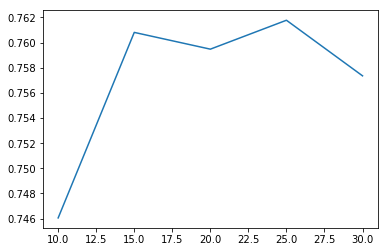

Training...
n_estimators =  60
max_depth =  10
0.749655555556
max_depth =  15
0.767555555556
max_depth =  20
0.770411111111
predict and write to file
max_depth =  25
0.772177777778
predict and write to file
max_depth =  30
0.769311111111


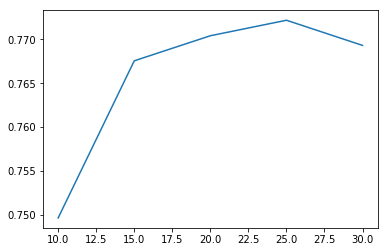

Training...
n_estimators =  100
max_depth =  10
0.7517
max_depth =  15
0.772411111111
predict and write to file
max_depth =  20
0.775866666667
predict and write to file
max_depth =  25
0.779011111111
predict and write to file
max_depth =  30
0.775111111111


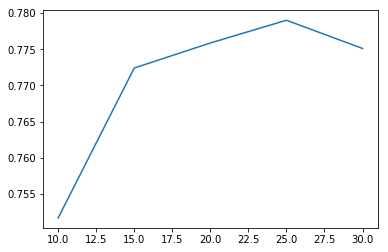

In [6]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import csv

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE

print('Read Data')
# Read train file
un_trainX = numpy.genfromtxt("trainFeatures.csv", delimiter=',')
n_trainX = un_trainX / un_trainX.max(axis=0)
trainLabel = numpy.genfromtxt("trainLabel.csv", delimiter=',')
# Read validation file
un_testX = numpy.genfromtxt("validationFeatures.csv", delimiter=',')
n_testX = un_testX / un_trainX.max(axis=0)
testLabel = numpy.genfromtxt("validationLabel.csv", delimiter=',')
# Read test file
un_testdata = numpy.genfromtxt("test.csv", delimiter=',')
n_testdata = un_testdata / un_trainX.max(axis=0)


# # Select features
# selection = SelectKBest(k=100).fit(n_trainX, trainLabel)
# n_trainX_new = selection.transform(n_trainX)
# n_testX_new = selection.transform(n_testX)
# n_testdata_new = selection.transform(n_testdata)

# Bagging and Random Forests
maX = 0
n = [30, 60, 100]
depth = [10, 15, 20, 25, 30]

for j in range(len(n)):
    print("Training...")
    # train normalized dataset
    print("n_estimators = ", n[j])
    accuracy = []
    for i in range(len(depth)):
        print("max_depth = ", depth[i])
        clf = RandomForestClassifier(n_estimators = n[j], max_depth = depth[i], random_state = 0)
        clf.fit(n_trainX, trainLabel)
        # compute accuracy
        result = clf.score(n_testX, testLabel)
        print(result)
        accuracy.append(result)
        
        if (result>0.77 and result>maX):
            maX = result
            print('predict and write to file')
            answer = clf.predict(n_testdata)
            numpy.savetxt('result.csv', answer, delimiter=',', fmt='%d')
            
    plt.plot(depth, accuracy)
    plt.show()

Read Data
Selecting features =  100
Training...
accuracy =  0.727233333333
accuracy =  0.734077777778
accuracy =  0.735522222222
accuracy =  0.736566666667


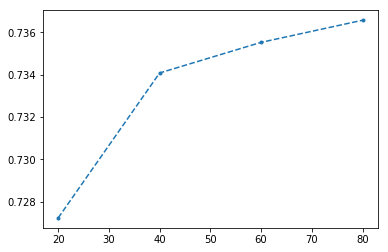

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import csv
import math

from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import BaggingClassifier

print('Read Data')
# Read train file
un_trainX = numpy.genfromtxt("trainFeatures.csv", delimiter=',')
n_trainX = un_trainX / un_trainX.max(axis=0)
trainLabel = numpy.genfromtxt("trainLabel.csv", delimiter=',')
# Read validation file
un_testX = numpy.genfromtxt("validationFeatures.csv", delimiter=',')
n_testX = un_testX / un_trainX.max(axis=0)
testLabel = numpy.genfromtxt("validationLabel.csv", delimiter=',')
# Read test file
un_testdata = numpy.genfromtxt("test.csv", delimiter=',')
n_testdata = un_testdata / un_trainX.max(axis=0)

# Select features
k = [100]
maX = 0
for i in range(len(k)):
    print("Selecting features = ", k[i])
    selection = SelectKBest(k=k[i]).fit(n_trainX, trainLabel)
#     n_trainX_new = selection.transform(n_trainX)
#     n_testX_new = selection.transform(n_testX)
#     n_testdata_new = selection.transform(n_testdata)
    n_trainX_new = n_trainX
    n_testX_new = n_testX
    n_testdata_new = n_testdata

    print('Training...')
    n = [20,40,60,80]
    accuracy = []
    for j in range(len(n)):
        estimator = MLPClassifier(verbose=0, random_state=0, max_iter=100, 
                            solver='adam', learning_rate_init=0.01)
        
        clf = BaggingClassifier(base_estimator= estimator, n_estimators=n[j], random_state=0, 
                               max_features=10, max_samples=10000)
        clf.fit(n_trainX_new, trainLabel)
        result = clf.score(n_testX_new, testLabel) 
        print("accuracy = ", result)
        accuracy.append(result)
        if (result > 0.78 and result > maX):
            maX = result
            print("Predict and write to file")
            answer = clf.predict(n_testdata_new)
            numpy.savetxt('result.csv', answer, delimiter=',', fmt='%d')

    plt.plot(n, accuracy, '--.')
    plt.show()
    

    

# print('Predicting...')

# print('Write result to disk')
